# <b>Python for Data Analysis</b>
# 11.  Time Series

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision = 4, suppress = True)
from pandas import Series, DataFrame
%matplotlib inline

## 11.1 Date and Time Data Types and Tools

In [3]:
from datetime import datetime

In [4]:
now = datetime.now()
now

datetime.datetime(2024, 2, 12, 17, 53, 44, 725320)

In [5]:
now.year, now.month, now.day

(2024, 2, 12)

In [6]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [7]:
delta.days

926

In [8]:
delta.seconds

56700

In [9]:
from datetime import timedelta

In [10]:
start = datetime(2011, 1, 7)

In [11]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [12]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting Between String and Datetime

In [13]:
stamp = datetime(2011, 1, 3)

In [14]:
str(stamp)

'2011-01-03 00:00:00'

In [15]:
stamp.strftime("%Y-%m-%d")

'2011-01-03'

In [16]:
value = "2011-01-03"

In [17]:
datetime.strptime(value, "%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
datestrs = ["7/6/2011", "8/6/2011"]

In [19]:
[datetime.strptime(x, "%m/%d/%Y") for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [20]:
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]

In [21]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [22]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [23]:
idx[2]

NaT

In [24]:
pd.isna(idx)

array([False, False,  True])

## 11.2 Time Series Basics

In [25]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [26]:
ts = pd.Series(np.random.standard_normal(6), index = dates)
ts

2011-01-02    1.817217
2011-01-05    0.652213
2011-01-07   -0.444400
2011-01-08    0.438402
2011-01-10    0.465392
2011-01-12    1.465780
dtype: float64

In [27]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [28]:
ts + ts[::2]

2011-01-02    3.634435
2011-01-05         NaN
2011-01-07   -0.888800
2011-01-08         NaN
2011-01-10    0.930784
2011-01-12         NaN
dtype: float64

In [29]:
ts.index.dtype

dtype('<M8[ns]')

In [30]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

In [31]:
ts

2011-01-02    1.817217
2011-01-05    0.652213
2011-01-07   -0.444400
2011-01-08    0.438402
2011-01-10    0.465392
2011-01-12    1.465780
dtype: float64

In [32]:
stamp = ts.index[2]

In [33]:
ts[stamp]

-0.4444000967855294

In [34]:
ts["2011-01-10"]

0.4653921377517724

In [35]:
longer_ts = pd.Series(np.random.standard_normal(1000),
                      index = pd.date_range("2000-01-01", periods = 1000))
longer_ts

2000-01-01   -0.372713
2000-01-02    0.991623
2000-01-03    0.977075
2000-01-04    0.735597
2000-01-05   -0.428866
                ...   
2002-09-22   -1.718054
2002-09-23    0.564306
2002-09-24   -1.380763
2002-09-25   -2.116051
2002-09-26   -0.892433
Freq: D, Length: 1000, dtype: float64

In [36]:
longer_ts["2001"]

2001-01-01   -0.612921
2001-01-02    0.323471
2001-01-03    0.083757
2001-01-04   -0.146481
2001-01-05   -0.252537
                ...   
2001-12-27   -0.153248
2001-12-28    0.526889
2001-12-29    0.359152
2001-12-30   -0.471098
2001-12-31   -0.170504
Freq: D, Length: 365, dtype: float64

In [37]:
longer_ts["2001-05"]

2001-05-01   -1.633075
2001-05-02   -0.642612
2001-05-03   -0.364624
2001-05-04    0.601471
2001-05-05    0.036679
                ...   
2001-05-27   -0.642871
2001-05-28    1.475390
2001-05-29   -0.763944
2001-05-30    0.882480
2001-05-31    0.961154
Freq: D, Length: 31, dtype: float64

In [38]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.444400
2011-01-08    0.438402
2011-01-10    0.465392
2011-01-12    1.465780
dtype: float64

In [39]:
ts[datetime(2011, 1, 7):datetime(2011, 1, 10)]

2011-01-07   -0.444400
2011-01-08    0.438402
2011-01-10    0.465392
dtype: float64

In [40]:
ts

2011-01-02    1.817217
2011-01-05    0.652213
2011-01-07   -0.444400
2011-01-08    0.438402
2011-01-10    0.465392
2011-01-12    1.465780
dtype: float64

In [41]:
ts["2011-01-06":"2011-01-11"]

2011-01-07   -0.444400
2011-01-08    0.438402
2011-01-10    0.465392
dtype: float64

In [42]:
ts.truncate(after = "2011-01-09")

2011-01-02    1.817217
2011-01-05    0.652213
2011-01-07   -0.444400
2011-01-08    0.438402
dtype: float64

In [43]:
dates = pd.date_range("2000-01-01", periods = 100, freq = "W-WED")
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [44]:
long_df = pd.DataFrame(np.random.standard_normal((100, 4)),
                       index = dates,
                       columns = ["Colorado", "Texas",
                                  "New York", "Ohio"])
long_df.head()

,Colorado,Texas,New York,Ohio
2000-01-05,1.318395,-0.068416,0.134108,2.518515
2000-01-12,-1.669465,0.861694,0.293457,1.027709
2000-01-19,-0.310962,-0.537579,0.270575,-0.730971
2000-01-26,1.384767,-1.202131,-0.273820,1.073882
2000-02-02,-0.097524,-0.187546,1.097494,0.696728


In [45]:
long_df.loc["2001-05"]

,Colorado,Texas,New York,Ohio
2001-05-02,1.274240,-0.372091,-0.749320,1.809864
2001-05-09,0.643795,1.669407,-0.296442,-0.110257
2001-05-16,-0.837560,0.693031,0.340775,-0.359168
2001-05-23,-0.557508,-1.512858,0.445136,0.301461
2001-05-30,0.545028,-0.976842,0.162439,-2.018333


### Time Series with Duplicate Indices

In [46]:
dates = pd.DatetimeIndex(["2000-01-01", "2000-01-02", "2000-01-02",
                          "2000-01-02", "2000-01-03"])

In [47]:
dup_ts = pd.Series(np.arange(5), index = dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [48]:
dup_ts.index.is_unique

False

In [49]:
dup_ts["2000-01-03"] # not duplicated

4

In [50]:
dup_ts["2000-01-02"] # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [51]:
grouped = dup_ts.groupby(level = 0)
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [52]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3 Date Ranges, Frequencies, and Shifting

In [53]:
ts

2011-01-02    1.817217
2011-01-05    0.652213
2011-01-07   -0.444400
2011-01-08    0.438402
2011-01-10    0.465392
2011-01-12    1.465780
dtype: float64

In [54]:
resampler = ts.resample("D")
resampler

### Generating Date Ranges

In [55]:
index = pd.date_range("2012-04-01", "2012-06-01")
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [56]:
pd.date_range("2024-01-01", "2024-02-29")

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12',
               '2024-01-13', '2024-01-14', '2024-01-15', '2024-01-16',
               '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-20',
               '2024-01-21', '2024-01-22', '2024-01-23', '2024-01-24',
               '2024-01-25', '2024-01-26', '2024-01-27', '2024-01-28',
               '2024-01-29', '2024-01-30', '2024-01-31', '2024-02-01',
               '2024-02-02', '2024-02-03', '2024-02-04', '2024-02-05',
               '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09',
               '2024-02-10', '2024-02-11', '2024-02-12', '2024-02-13',
               '2024-02-14', '2024-02-15', '2024-02-16', '2024-02-17',
               '2024-02-18', '2024-02-19', '2024-02-20', '2024-02-21',
               '2024-02-22', '2024-02-23', '2024-02-24', '2024-02-25',
      

In [57]:
pd.date_range(end = "2012-06-01", periods = 20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [58]:
pd.date_range(end = "2012-06-01", periods = 20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [59]:
pd.date_range("2000-01-01", "2000-12-01", freq = "BM")

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [60]:
pd.date_range("2012-05-02 12:56:31", periods = 5, normalize = True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [61]:
pd.date_range("2012-05-02 12:56:31", periods = 5, normalize = True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [62]:
from pandas.tseries.offsets import Hour, Minute

In [63]:
hour = Hour()
hour

<Hour>

In [64]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [65]:
pd.date_range("2000-01-01", "2000-01-03 23:59", freq = "4H")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [66]:
Hour(2) + Minute(30)

<150 * Minutes>

In [67]:
pd.date_range("2000-01-01", periods = 10, freq = "1h30min")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates

In [68]:
monthly_dates = pd.date_range("2012-01-01", "2012-09-01", freq = "WOM-3FRI")

In [69]:
list(monthly_dates)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (Leading and Lagging) Data

In [70]:
ts = pd.Series(np.random.standard_normal(4),
               index = pd.date_range("2000-01-01", periods = 4, freq = "M"))
ts

2000-01-31   -0.541026
2000-02-29   -1.217363
2000-03-31    0.844749
2000-04-30   -0.990252
Freq: M, dtype: float64

In [71]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.541026
2000-04-30   -1.217363
Freq: M, dtype: float64

In [72]:
ts.shift(-2)

2000-01-31    0.844749
2000-02-29   -0.990252
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [73]:
ts

2000-01-31   -0.541026
2000-02-29   -1.217363
2000-03-31    0.844749
2000-04-30   -0.990252
Freq: M, dtype: float64

In [74]:
ts.shift(1)

2000-01-31         NaN
2000-02-29   -0.541026
2000-03-31   -1.217363
2000-04-30    0.844749
Freq: M, dtype: float64

In [75]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29    1.250102
2000-03-31   -1.693917
2000-04-30   -2.172244
Freq: M, dtype: float64

In [76]:
(0.950065 / -0.737922) - 1

-2.28748702437385

In [77]:
ts.pct_change()

2000-01-31         NaN
2000-02-29    1.250102
2000-03-31   -1.693917
2000-04-30   -2.172244
Freq: M, dtype: float64

In [78]:
ts

2000-01-31   -0.541026
2000-02-29   -1.217363
2000-03-31    0.844749
2000-04-30   -0.990252
Freq: M, dtype: float64

In [79]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.541026
2000-04-30   -1.217363
Freq: M, dtype: float64

In [80]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.541026
2000-04-30   -1.217363
Freq: M, dtype: float64

In [81]:
ts.shift(3, freq = "D")

2000-02-03   -0.541026
2000-03-03   -1.217363
2000-04-03    0.844749
2000-05-03   -0.990252
dtype: float64

In [82]:
ts.shift(1, freq = "90T")

2000-01-31 01:30:00   -0.541026
2000-02-29 01:30:00   -1.217363
2000-03-31 01:30:00    0.844749
2000-04-30 01:30:00   -0.990252
dtype: float64

#### Shifting dates with offsets

In [83]:
from pandas.tseries.offsets import Day, MonthEnd

In [84]:
now = datetime(2011, 11, 17)

In [85]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [86]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [87]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [88]:
offset = MonthEnd()

In [89]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [90]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [91]:
ts = pd.Series(np.random.standard_normal(20),
               index = pd.date_range("2000-01-15", periods = 20, freq = "4D"))
ts

2000-01-15   -0.853147
2000-01-19   -0.328684
2000-01-23   -0.927091
2000-01-27    0.481775
2000-01-31    0.285744
2000-02-04    0.432525
2000-02-08   -0.342965
2000-02-12    0.400792
2000-02-16   -0.465571
2000-02-20   -1.158225
2000-02-24   -0.037927
2000-02-28   -0.475250
2000-03-03   -0.800170
2000-03-07   -0.019579
2000-03-11    1.612022
2000-03-15    0.516178
2000-03-19    1.074926
2000-03-23   -1.405663
2000-03-27    0.393046
2000-03-31   -1.332294
Freq: 4D, dtype: float64

In [92]:
ts.groupby(MonthEnd().rollforward).mean()

2000-01-31   -0.268281
2000-02-29   -0.235231
2000-03-31    0.004808
dtype: float64

In [93]:
ts.resample("M").mean()

2000-01-31   -0.268281
2000-02-29   -0.235231
2000-03-31    0.004808
Freq: M, dtype: float64

## 11.4 Time Zone Handling

In [94]:
import pytz

In [95]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [96]:
tz = pytz.timezone("America/New_York")
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

In [97]:
dates = pd.date_range("2012-03-09 09:30", periods = 6)

In [98]:
ts = pd.Series(np.random.standard_normal(len(dates)), index = dates)
ts

2012-03-09 09:30:00    0.301082
2012-03-10 09:30:00    1.204768
2012-03-11 09:30:00   -1.034882
2012-03-12 09:30:00    0.190233
2012-03-13 09:30:00    0.317322
2012-03-14 09:30:00   -0.968016
Freq: D, dtype: float64

In [99]:
print(ts.index.tz)

None


In [100]:
pd.date_range("2012-03-09 09:30", periods = 10, tz = "UTC")

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [101]:
ts

2012-03-09 09:30:00    0.301082
2012-03-10 09:30:00    1.204768
2012-03-11 09:30:00   -1.034882
2012-03-12 09:30:00    0.190233
2012-03-13 09:30:00    0.317322
2012-03-14 09:30:00   -0.968016
Freq: D, dtype: float64

In [102]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-09 09:30:00+00:00    0.301082
2012-03-10 09:30:00+00:00    1.204768
2012-03-11 09:30:00+00:00   -1.034882
2012-03-12 09:30:00+00:00    0.190233
2012-03-13 09:30:00+00:00    0.317322
2012-03-14 09:30:00+00:00   -0.968016
Freq: D, dtype: float64

In [103]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [104]:
ts_utc.tz_convert("Europe/Amsterdam")

2012-03-09 10:30:00+01:00    0.301082
2012-03-10 10:30:00+01:00    1.204768
2012-03-11 10:30:00+01:00   -1.034882
2012-03-12 10:30:00+01:00    0.190233
2012-03-13 10:30:00+01:00    0.317322
2012-03-14 10:30:00+01:00   -0.968016
Freq: D, dtype: float64

In [105]:
ts_utc.tz_convert("Europe/Amsterdam")

2012-03-09 10:30:00+01:00    0.301082
2012-03-10 10:30:00+01:00    1.204768
2012-03-11 10:30:00+01:00   -1.034882
2012-03-12 10:30:00+01:00    0.190233
2012-03-13 10:30:00+01:00    0.317322
2012-03-14 10:30:00+01:00   -0.968016
Freq: D, dtype: float64

In [106]:
ts_eastern = ts.tz_localize("America/New_York")
ts_eastern

2012-03-09 09:30:00-05:00    0.301082
2012-03-10 09:30:00-05:00    1.204768
2012-03-11 09:30:00-04:00   -1.034882
2012-03-12 09:30:00-04:00    0.190233
2012-03-13 09:30:00-04:00    0.317322
2012-03-14 09:30:00-04:00   -0.968016
dtype: float64

In [107]:
ts_eastern.tz_convert("Europe/Berlin")

2012-03-09 15:30:00+01:00    0.301082
2012-03-10 15:30:00+01:00    1.204768
2012-03-11 14:30:00+01:00   -1.034882
2012-03-12 14:30:00+01:00    0.190233
2012-03-13 14:30:00+01:00    0.317322
2012-03-14 14:30:00+01:00   -0.968016
dtype: float64

In [108]:
ts.index.tz_localize("Asia/Shanghai")

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### Operations with Time Zone-Aware Timestamp Objects

In [109]:
stamp = pd.Timestamp("2011-03-12 04:00")

In [110]:
stamp_utc = stamp.tz_localize("utc")

In [111]:
stamp_utc.tz_convert("America/New_York")

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [112]:
stamp_moscow = pd.Timestamp("2011-03-12 04:00", tz = "Europe/Moscow")

In [113]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [114]:
stamp_utc.value

1299902400000000000

In [115]:
stamp_utc.tz_convert("America/New_York").value

1299902400000000000

In [116]:
stamp = pd.Timestamp("2012-03-11 01:30", tz = "US/Eastern")
stamp

Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

In [117]:
stamp + Hour()

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

In [118]:
stamp = pd.Timestamp("2012-11-04 00:30", tz = "US/Eastern")
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [119]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones

In [120]:
dates = pd.date_range("2012-03-07 09:30", periods = 10, freq = "B")

In [121]:
ts = pd.Series(np.random.standard_normal(len(dates)), index = dates)
ts

2012-03-07 09:30:00    0.579026
2012-03-08 09:30:00   -0.792886
2012-03-09 09:30:00    1.242439
2012-03-12 09:30:00   -0.698501
2012-03-13 09:30:00   -0.907928
2012-03-14 09:30:00    1.523403
2012-03-15 09:30:00   -1.826044
2012-03-16 09:30:00   -0.394358
2012-03-19 09:30:00    0.813700
2012-03-20 09:30:00    0.303183
Freq: B, dtype: float64

In [122]:
ts1 = ts[:7].tz_localize("Europe/London")

In [123]:
ts2 = ts1[2:].tz_convert("Europe/Moscow")

In [124]:
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## 11.5 Periods and Period Arithmetic

In [125]:
p = pd.Period("2011", freq = "A-DEC")
p

Period('2011', 'A-DEC')

In [126]:
p + 5

Period('2016', 'A-DEC')

In [127]:
p - 2

Period('2009', 'A-DEC')

In [128]:
pd.Period("2014", freq = "A-DEC") - p

<3 * YearEnds: month=12>

In [129]:
periods = pd.period_range("2000-01-01", "2000-06-30", freq = "M")
periods

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [130]:
pd.Series(np.random.standard_normal(6), index = periods)

2000-01    0.005160
2000-02    0.275487
2000-03    0.214067
2000-04   -0.036938
2000-05   -0.500137
2000-06   -0.421228
Freq: M, dtype: float64

In [131]:
values = ["2001Q3", "2002Q2", "2003Q1"]

In [132]:
index = pd.PeriodIndex(values, freq = "Q-DEC")
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### Period Frequency Conversion

In [133]:
p = pd.Period("2011", freq = "A-DEC")
p

Period('2011', 'A-DEC')

In [134]:
p.asfreq("M", how = "start")

Period('2011-01', 'M')

In [135]:
p.asfreq("M", how = "end")

Period('2011-12', 'M')

In [136]:
p.asfreq("M")

Period('2011-12', 'M')

In [137]:
p = pd.Period("Aug-2011", "M")

In [138]:
p.asfreq("A-JUN")

Period('2012', 'A-JUN')

In [139]:
periods = pd.period_range("2006", "2009", freq = "A-DEC")

In [140]:
ts = pd.Series(np.random.standard_normal(len(periods)), index = periods)
ts

2006   -1.514244
2007   -0.710069
2008    1.152380
2009   -0.625380
Freq: A-DEC, dtype: float64

In [141]:
ts.asfreq("M", how = "start")

2006-01   -1.514244
2007-01   -0.710069
2008-01    1.152380
2009-01   -0.625380
Freq: M, dtype: float64

In [142]:
ts.asfreq("B", how = "end")

2006-12-29   -1.514244
2007-12-31   -0.710069
2008-12-31    1.152380
2009-12-31   -0.625380
Freq: B, dtype: float64

### Quarterly Period Frequencies

In [143]:
p = pd.Period("2012Q4", freq = "Q-JAN")
p

Period('2012Q4', 'Q-JAN')

In [144]:
p.asfreq("D", how = "start")

Period('2011-11-01', 'D')

In [145]:
p.asfreq("D", how = "end")

Period('2012-01-31', 'D')

In [146]:
p4pm = (p.asfreq("B", how = "end") - 1).asfreq("T", how = "start") + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [147]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [148]:
periods = pd.period_range("2011Q3", "2012Q4", freq = "Q-JAN")

In [149]:
ts = pd.Series(np.arange(len(periods)), index = periods)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [150]:
new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16

In [151]:
ts.index = new_periods.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### Converting Timestamps to Periods (and Back)

In [152]:
dates = pd.date_range("2000-01-01", periods = 3, freq = "M")

In [153]:
ts = pd.Series(np.random.standard_normal(3), index = dates)
ts

2000-01-31    0.831085
2000-02-29    2.318679
2000-03-31    0.634364
Freq: M, dtype: float64

In [154]:
pts = ts.to_period()
pts

2000-01    0.831085
2000-02    2.318679
2000-03    0.634364
Freq: M, dtype: float64

In [155]:
dates = pd.date_range("2000-01-29", periods = 6)

In [156]:
ts2 = pd.Series(np.random.standard_normal(6), index = dates)
ts2

2000-01-29    1.583267
2000-01-30    1.180778
2000-01-31   -1.447098
2000-02-01    0.595232
2000-02-02   -0.049543
2000-02-03   -0.421156
Freq: D, dtype: float64

In [157]:
ts2.to_period("M")

2000-01    1.583267
2000-01    1.180778
2000-01   -1.447098
2000-02    0.595232
2000-02   -0.049543
2000-02   -0.421156
Freq: M, dtype: float64

In [158]:
pts = ts2.to_period()
pts

2000-01-29    1.583267
2000-01-30    1.180778
2000-01-31   -1.447098
2000-02-01    0.595232
2000-02-02   -0.049543
2000-02-03   -0.421156
Freq: D, dtype: float64

In [159]:
pts.to_timestamp(how = "end")

2000-01-29 23:59:59.999999999    1.583267
2000-01-30 23:59:59.999999999    1.180778
2000-01-31 23:59:59.999999999   -1.447098
2000-02-01 23:59:59.999999999    0.595232
2000-02-02 23:59:59.999999999   -0.049543
2000-02-03 23:59:59.999999999   -0.421156
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays

In [160]:
data = pd.read_csv("examples/macrodata.csv")
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [161]:
data["year"]

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [162]:
data["quarter"]

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

In [163]:
index = pd.PeriodIndex(year = data["year"], quarter = data["quarter"],
                       freq = "Q-DEC")
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [164]:
data.index = index

In [165]:
data["infl"]

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 11.6 Resampling and Frequency Conversion

In [166]:
dates = pd.date_range("2000-01-01", periods = 100)

In [167]:
ts = pd.Series(np.random.standard_normal(len(dates)),
               index = dates)
ts

2000-01-01    0.372238
2000-01-02   -0.355369
2000-01-03    0.707450
2000-01-04   -0.882100
2000-01-05   -1.702182
                ...   
2000-04-05    0.785083
2000-04-06   -0.068198
2000-04-07    0.859879
2000-04-08   -0.073309
2000-04-09   -1.889221
Freq: D, Length: 100, dtype: float64

In [168]:
ts.resample("M").mean()

2000-01-31   -0.107576
2000-02-29   -0.216648
2000-03-31   -0.451551
2000-04-30    0.032732
Freq: M, dtype: float64

In [169]:
ts.resample("M", kind = "period").mean()

2000-01   -0.107576
2000-02   -0.216648
2000-03   -0.451551
2000-04    0.032732
Freq: M, dtype: float64

### Downsampling

In [170]:
dates = pd.date_range("2000-01-01", periods = 12, freq = "T")

In [171]:
ts = pd.Series(np.arange(len(dates)), index = dates)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [172]:
ts.resample("5min").sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [173]:
ts.resample("5min", closed = "right").sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [174]:
ts.resample("5min", closed = "right", label = "right").sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [175]:
from pandas.tseries.frequencies import to_offset

In [176]:
result = ts.resample("5min", closed = "right", label = "right").sum()

In [177]:
result.index = result.index + to_offset("-1s")
result

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

#### Open-high-low-close (OHLC) resampling

In [178]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index = dates)
ts

2000-01-01 00:00:00     4
2000-01-01 00:01:00     0
2000-01-01 00:02:00     7
2000-01-01 00:03:00     1
2000-01-01 00:04:00    10
2000-01-01 00:05:00     2
2000-01-01 00:06:00     5
2000-01-01 00:07:00     8
2000-01-01 00:08:00     6
2000-01-01 00:09:00     9
2000-01-01 00:10:00     3
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [179]:
ts.resample("5min").ohlc()

,open,high,low,close
2000-01-01 00:00:00,4,10,0,10
2000-01-01 00:05:00,2,9,2,9
2000-01-01 00:10:00,3,11,3,11


### Upsampling and Interpolation

In [180]:
frame = pd.DataFrame(np.random.standard_normal((2, 4)),
                     index = pd.date_range("2000-01-01", periods = 2,
                                           freq = "W-WED"),
                     columns = ["Colorado", "Texas", "New York", "Ohio"])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.155568,-0.085734,0.218254,-1.049153
2000-01-12,0.471092,-0.046727,0.770922,0.445481


In [181]:
df_daily = frame.resample("D").asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.155568,-0.085734,0.218254,-1.049153
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.471092,-0.046727,0.770922,0.445481


In [182]:
frame.resample("D").ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.155568,-0.085734,0.218254,-1.049153
2000-01-06,-0.155568,-0.085734,0.218254,-1.049153
2000-01-07,-0.155568,-0.085734,0.218254,-1.049153
2000-01-08,-0.155568,-0.085734,0.218254,-1.049153
2000-01-09,-0.155568,-0.085734,0.218254,-1.049153
2000-01-10,-0.155568,-0.085734,0.218254,-1.049153
2000-01-11,-0.155568,-0.085734,0.218254,-1.049153
2000-01-12,0.471092,-0.046727,0.770922,0.445481


In [183]:
frame.resample("D").ffill(limit = 2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.155568,-0.085734,0.218254,-1.049153
2000-01-06,-0.155568,-0.085734,0.218254,-1.049153
2000-01-07,-0.155568,-0.085734,0.218254,-1.049153
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.471092,-0.046727,0.770922,0.445481


In [184]:
frame.resample("W-THU").ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.155568,-0.085734,0.218254,-1.049153
2000-01-13,0.471092,-0.046727,0.770922,0.445481


### Resampling with Periods

In [185]:
frame = pd.DataFrame(np.random.standard_normal((24, 4)),
                     index = pd.period_range("1-2000", "12-2001",
                                             freq = "M"),
                     columns = ["Colorado", "Texas", "New York", "Ohio"])
frame.head()

,Colorado,Texas,New York,Ohio
2000-01,-0.523098,-0.309631,-1.148731,0.913948
2000-02,0.372840,-0.649983,0.612981,2.240128
2000-03,-0.179744,-0.384649,-1.075737,1.338459
2000-04,-0.079598,0.973628,0.247612,1.352846
2000-05,0.040710,-1.221903,0.056432,-0.009182


In [186]:
annual_frame = frame.resample("A-DEC").mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.326517,-0.069766,0.110258,0.531767
2001,0.090695,0.074606,0.077260,-0.062892


In [187]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample("Q-DEC").ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.326517,-0.069766,0.110258,0.531767
2000Q2,0.326517,-0.069766,0.110258,0.531767
2000Q3,0.326517,-0.069766,0.110258,0.531767
2000Q4,0.326517,-0.069766,0.110258,0.531767
2001Q1,0.090695,0.074606,0.077260,-0.062892
2001Q2,0.090695,0.074606,0.077260,-0.062892
2001Q3,0.090695,0.074606,0.077260,-0.062892
2001Q4,0.090695,0.074606,0.077260,-0.062892


In [188]:
annual_frame.resample("Q-DEC", convention = "end").asfreq()

,Colorado,Texas,New York,Ohio
2000Q4,0.326517,-0.069766,0.110258,0.531767
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.090695,0.074606,0.077260,-0.062892


In [190]:
annual_frame.resample("Q-DEC", convention = "start").asfreq()

,Colorado,Texas,New York,Ohio
2000Q1,0.326517,-0.069766,0.110258,0.531767
2000Q2,NaN,NaN,NaN,NaN
2000Q3,NaN,NaN,NaN,NaN
2000Q4,NaN,NaN,NaN,NaN
2001Q1,0.090695,0.074606,0.077260,-0.062892
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,NaN,NaN,NaN,NaN


In [189]:
annual_frame.resample("Q-MAR").ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.326517,-0.069766,0.110258,0.531767
2001Q1,0.326517,-0.069766,0.110258,0.531767
2001Q2,0.326517,-0.069766,0.110258,0.531767
2001Q3,0.326517,-0.069766,0.110258,0.531767
2001Q4,0.090695,0.074606,0.077260,-0.062892
2002Q1,0.090695,0.074606,0.077260,-0.062892
2002Q2,0.090695,0.074606,0.077260,-0.062892
2002Q3,0.090695,0.074606,0.077260,-0.062892


### Grouped Time Resampling

In [191]:
N = 15

In [192]:
times = pd.date_range("2017-05-20 00:00", freq = "1min", periods = N)

In [193]:
df = pd.DataFrame({"time": times,
                   "value": np.arange(N)})
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [194]:
df.set_index("time").resample("5min").count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [195]:
df2 = pd.DataFrame({"time": times.repeat(3),
                    "key": np.tile(["a", "b", "c"], N),
                    "value": np.arange(N * 3.)})
df2.head(7)

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0


In [196]:
time_key = pd.Grouper(freq = "5min")

In [197]:
resampled = (df2.set_index("time")
             .groupby(["key", time_key])
             .sum())
resampled

value
key time                      
a   2017-05-20 00:00:00   30.0
    2017-05-20 00:05:00  105.0
    2017-05-20 00:10:00  180.0
b   2017-05-20 00:00:00   35.0
    2017-05-20 00:05:00  110.0
    2017-05-20 00:10:00  185.0
c   2017-05-20 00:00:00   40.0
    2017-05-20 00:05:00  115.0
    2017-05-20 00:10:00  190.0

## 11.7 Moving Window Functions

In [198]:
close_px_all = pd.read_csv("examples/stock_px.csv",
                           parse_dates = True, index_col = 0)

In [199]:
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]

In [200]:
close_px = close_px.resample("B").ffill()

In [201]:
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [202]:
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


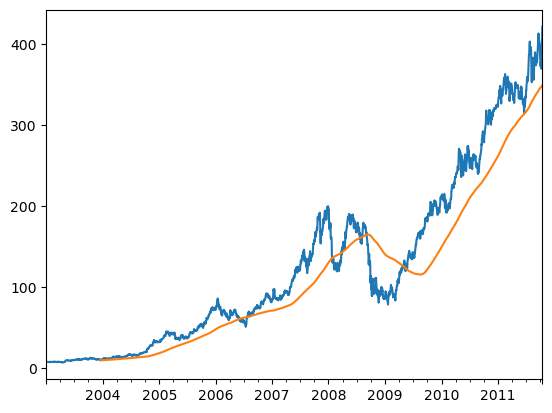

In [205]:
close_px["AAPL"].plot()
close_px["AAPL"].rolling(250).mean().plot();

In [206]:
plt.figure();

<Figure size 640x480 with 0 Axes>

In [207]:
std250 = close_px["AAPL"].pct_change().rolling(250, min_periods = 10).std()
std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16    0.009628
2003-01-17    0.013818
Freq: B, Name: AAPL, dtype: float64

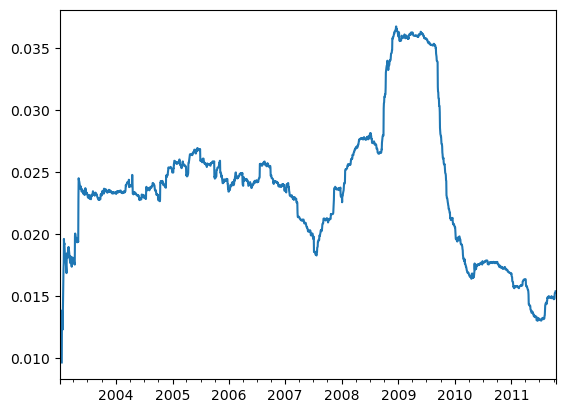

In [208]:
std250.plot();

In [209]:
expanding_mean = std250.expanding().mean()

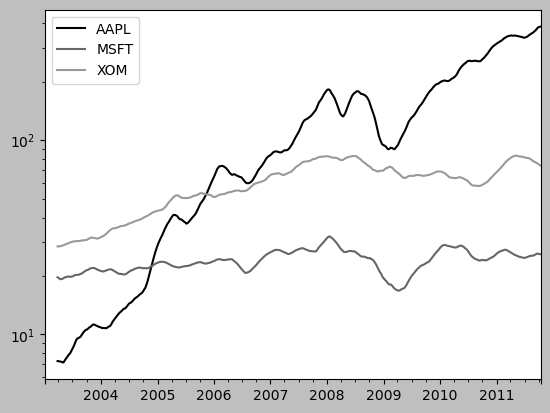

In [211]:
plt.style.use('grayscale')
close_px.rolling(60).mean().plot(logy = True);

In [212]:
close_px.rolling("20D").mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions

In [221]:
aapl_px = close_px["AAPL"]["2006":"2007"]
aapl_px

2006-01-02     71.89
2006-01-03     74.75
2006-01-04     74.97
2006-01-05     74.38
2006-01-06     76.30
               ...  
2007-12-25    198.80
2007-12-26    198.95
2007-12-27    198.57
2007-12-28    199.83
2007-12-31    198.08
Freq: B, Name: AAPL, Length: 521, dtype: float64

In [222]:
ma30 = aapl_px.rolling(30, min_periods = 20).mean()
ma30

2006-01-02           NaN
2006-01-03           NaN
2006-01-04           NaN
2006-01-05           NaN
2006-01-06           NaN
                 ...    
2007-12-25    181.520333
2007-12-26    182.615000
2007-12-27    183.757333
2007-12-28    184.872000
2007-12-31    186.009667
Freq: B, Name: AAPL, Length: 521, dtype: float64

In [223]:
ewma30 = aapl_px.ewm(span = 30).mean()

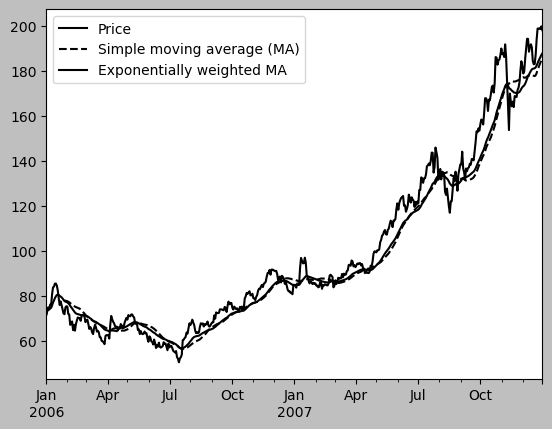

In [228]:
aapl_px.plot(style = "k-", label = "Price")
ma30.plot(style = "k--", label = "Simple moving average (MA)")
ewma30.plot(style = "k-", label = "Exponentially weighted MA")
plt.legend();

### Binary Moving Window Functions

In [232]:
spx_px = close_px_all["SPX"]
spx_px

2003-01-02     909.03
2003-01-03     908.59
2003-01-06     929.01
2003-01-07     922.93
2003-01-08     909.93
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 2214, dtype: float64

In [233]:
spx_rets = spx_px.pct_change()
spx_rets

2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
                ...   
2011-10-10    0.034125
2011-10-11    0.000544
2011-10-12    0.009795
2011-10-13   -0.002974
2011-10-14    0.017380
Name: SPX, Length: 2214, dtype: float64

In [234]:
returns = close_px.pct_change()
returns

,AAPL,MSFT,XOM
2003-01-02,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684
2003-01-06,0.000000,0.017975,0.024624
2003-01-07,-0.002685,0.019052,-0.033712
2003-01-08,-0.020188,-0.028272,-0.004145
...,...,...,...
2011-10-10,0.051406,0.026286,0.036977
2011-10-11,0.029526,0.002227,-0.000131
2011-10-12,0.004747,-0.001481,0.011669
2011-10-13,0.015515,0.008160,-0.010238


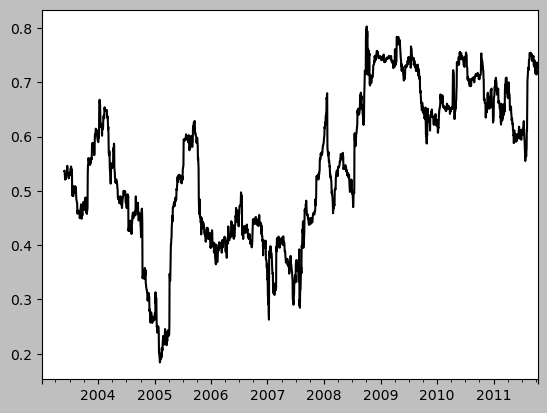

In [235]:
corr = returns["AAPL"].rolling(125, min_periods = 100).corr(spx_rets)
corr.plot();

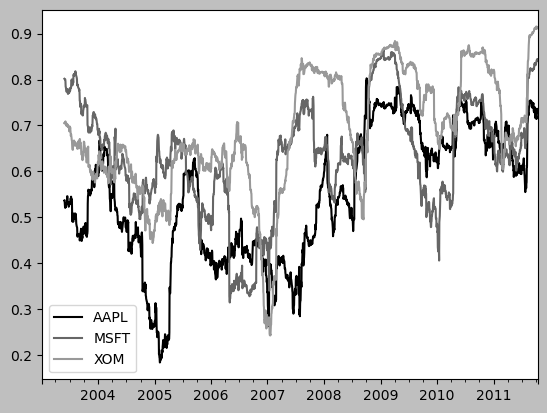

In [236]:
corr = returns.rolling(125, min_periods = 100).corr(spx_rets)
corr.plot();

### User-Defined Moving Window Functions

In [239]:
from scipy.stats import percentileofscore

In [240]:
def score_at_2percent(x):
    return percentileofscore(x, 0.02)

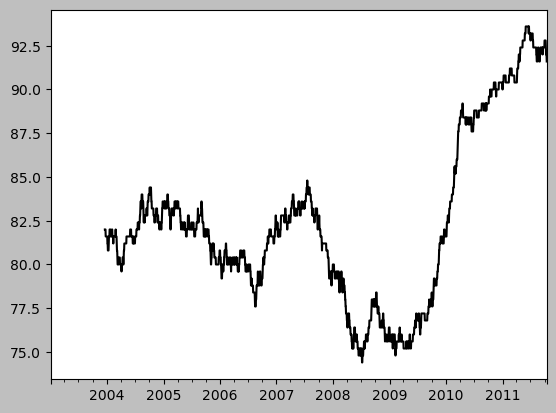

In [241]:
result = returns["AAPL"].rolling(250).apply(score_at_2percent)
result.plot();